In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
sns.set()

In [5]:
alpha=pickle.load(open("ts/results-2.txt","rb"))
beta=pickle.load(open("ts/vcresults-2.txt","rb"))
gamma=pickle.load(open("ts/Scoreresults-2.txt","rb"))

for i in beta:
    for year in beta[i]:
        if len(beta[i][year])!=0:
            beta[i][year]=np.mean(beta[i][year])
        else:
            beta[i][year]=0
            
for i in gamma:
    for year in gamma[i]:
        if len(gamma[i][year])!=0:
            gamma[i][year]=np.mean(gamma[i][year]) 
        else:
            gamma[i][year]=0
            
print(alpha['mongodb'])
print(beta['mongodb'])
print(gamma['mongodb'])

OrderedDict([('2008', 1), ('2009', 35), ('2010', 1036), ('2011', 3825), ('2012', 7426), ('2013', 10583), ('2014', 13354), ('2015', 16908), ('2016', 18761), ('2017', 19560)])
OrderedDict([('2008', 10974.0), ('2009', 18993.400000000001), ('2010', 8526.3552123552126), ('2011', 5196.532026143791), ('2012', 3379.826151360086), ('2013', 2209.0271189643768), ('2014', 1269.586940242624), ('2015', 768.78158268275376), ('2016', 385.50375779542668), ('2017', 115.42223926380368)])
OrderedDict([('2008', 36.0), ('2009', 45.057142857142857), ('2010', 13.369691119691121), ('2011', 6.3861437908496734), ('2012', 3.8136277942364663), ('2013', 2.3255220636870453), ('2014', 1.2952673356297739), ('2015', 1.1111308256446653), ('2016', 0.74425670273439581), ('2017', 0.32367075664621675)])


In [6]:
nosql={}
nosql["keyvalue"]=['redis','dynamo','dbm','aerospike', 'memcachedb', 'riak', 'berkeley db']
nosql["column"]=['cassandra','hbase','vertica','accumulo','druid']
nosql["graph"]=['neo4j','virtuoso','allegrograph']
nosql["document"]=['mongodb','apache couchdb', 'basex','cosmos db', 'rethinkdb']
nosql["multimodel"]=['arangodb','couchbase', 'marklogic','orientdb']
nosql["Comparison"]=["mongodb","neo4j","cassandra","redis"]

#nosql["MongoDB"]=['ruby','python', 'php', 'java', 'js', '.net',  'node', 'c++', 'c#']
#nosql["Cassandra-Versions"]=['c2.0', 'c3.0', 'c0.7', 'c2.1', 'c2.2']
#nosql["Cassandra"]=['spark', 'c-jdbc', '.net library', 'python driver', 'node driver', 'c# driver']
#nosql["Hadoop"]=['hadoop','hadoop 2', 'hadoop3','hdfs']
#nosql["NewSQL"]=['voltdb', 'â€žcockroachdb', 'nuodb', 'hana', 'memsql']


In [7]:
 
def norm(a,data,year):
    minx,div=getminmax(data,year)
    
    if (a-minx)/div>1:
        print("wrong")
    return (a-minx)/div

def getminmax(data,year):
    temp=[]
    for i in ['keyvalue','column','graph','document']:
        for dbs in nosql[i]:
            temp.append(data[dbs][year])
    return min(temp),max(temp)-min(temp)
    
print(getminmax(gamma,"2008"))

(0, 36.0)


keyvalue


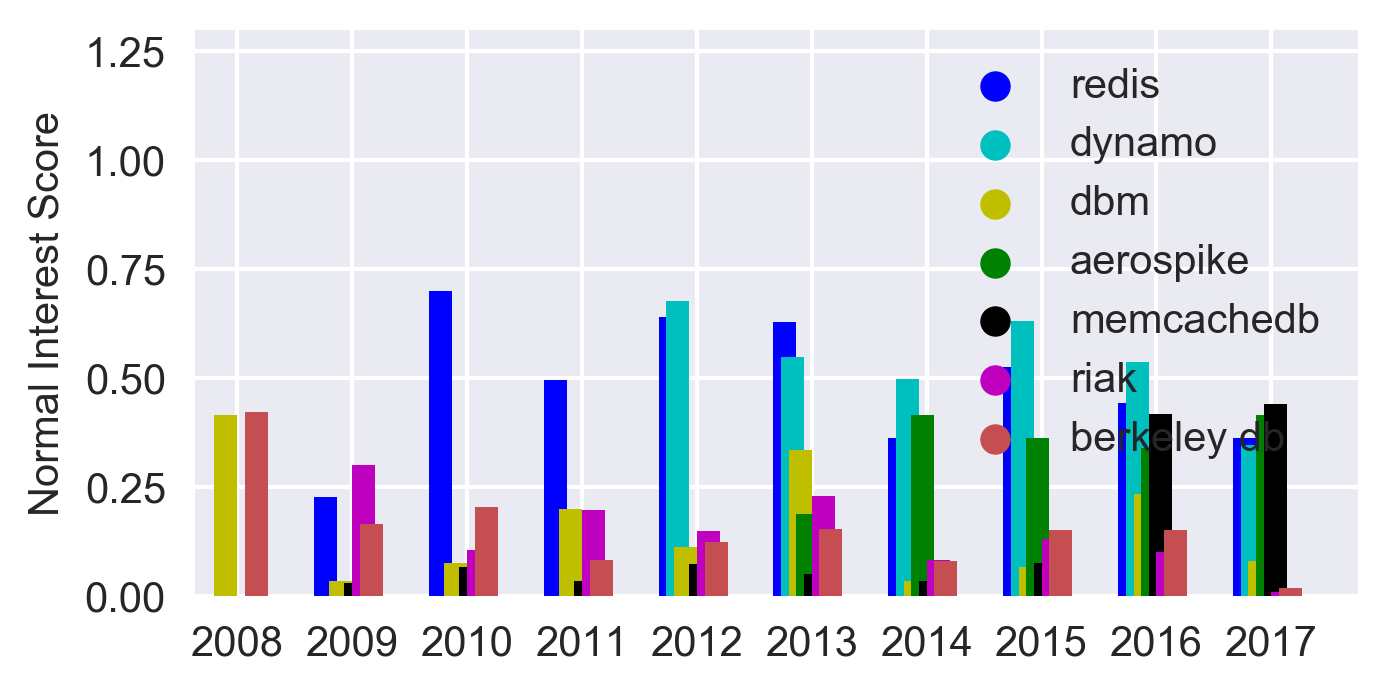

document


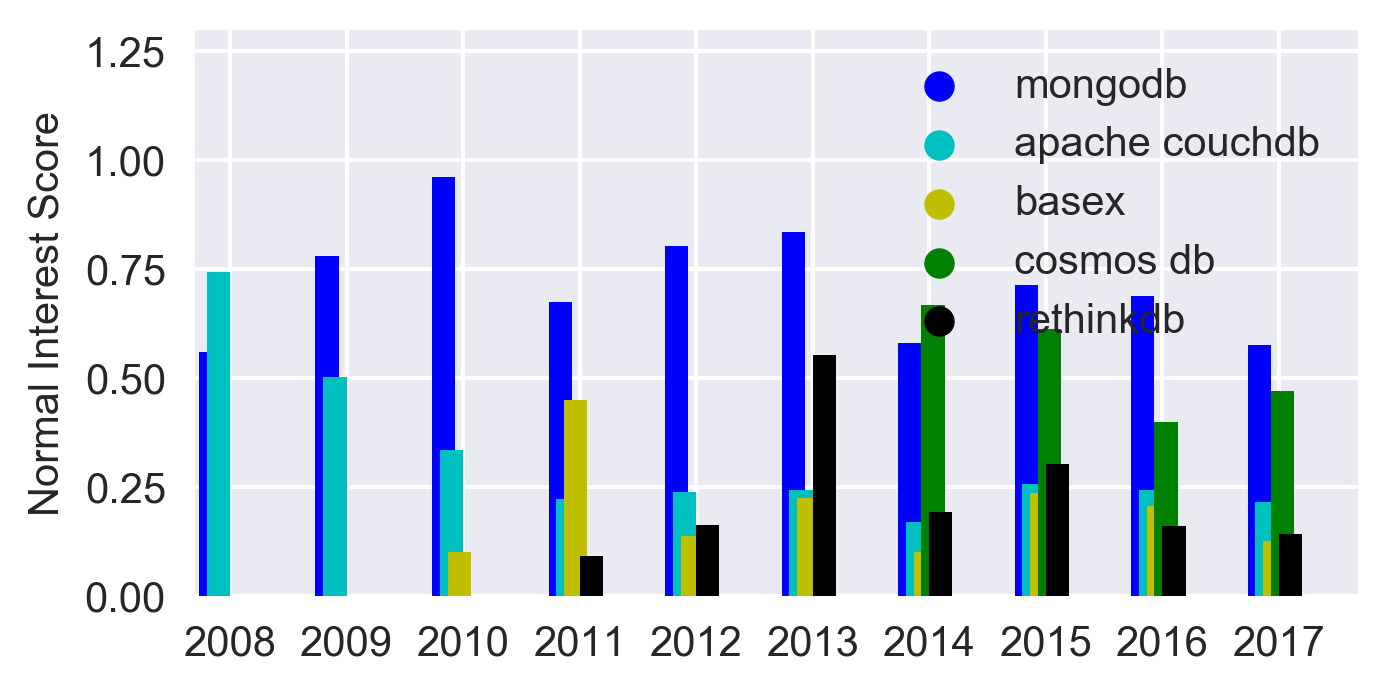

column


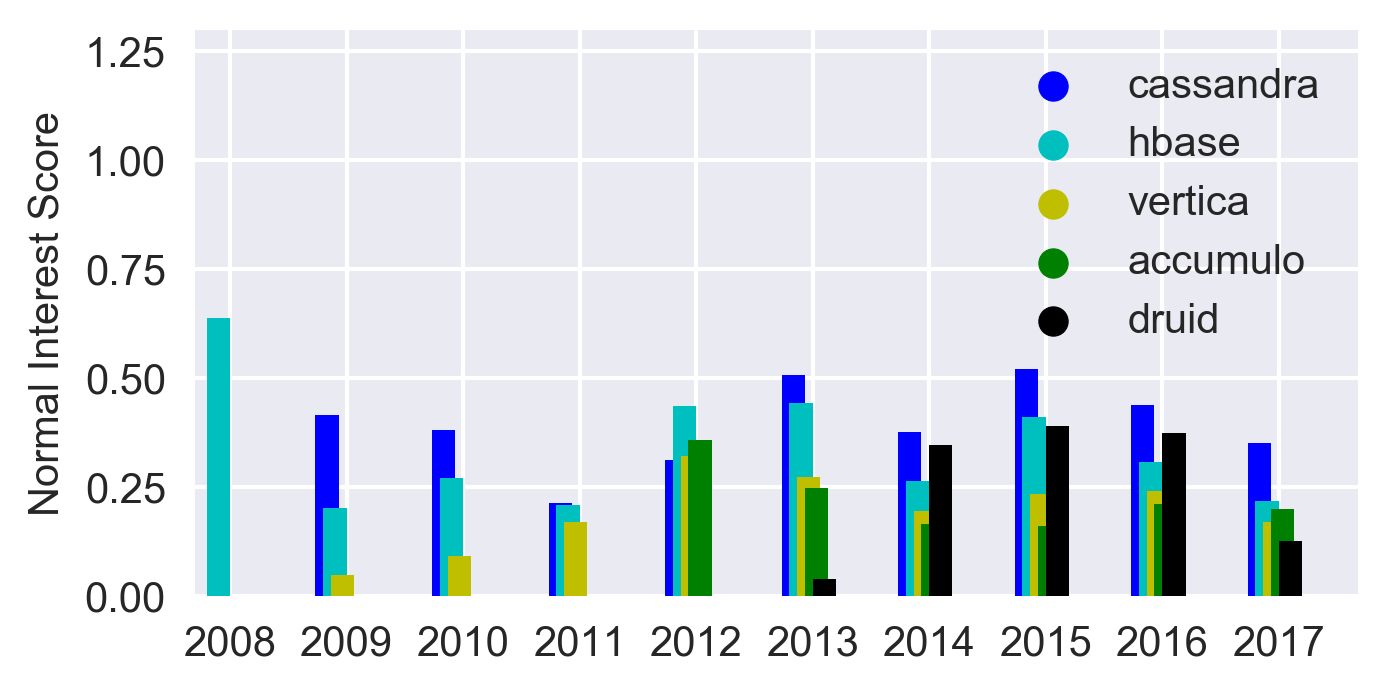

graph


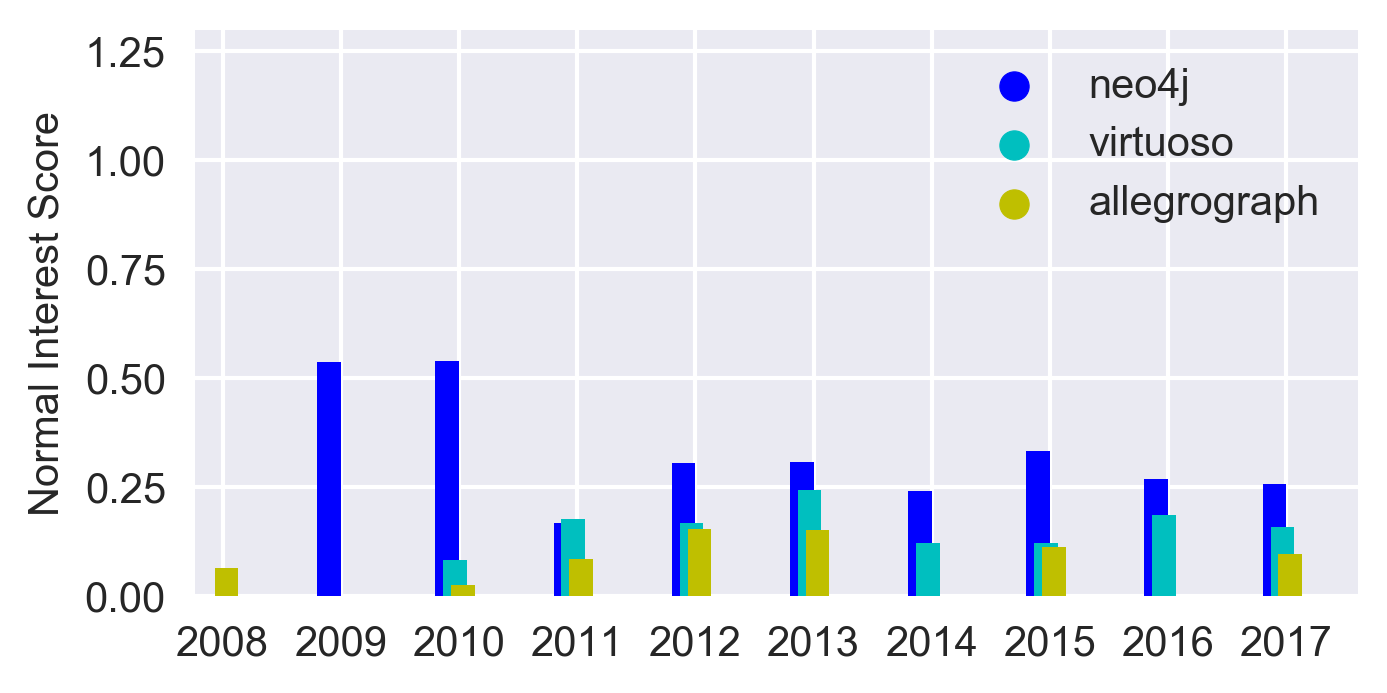

Comparison


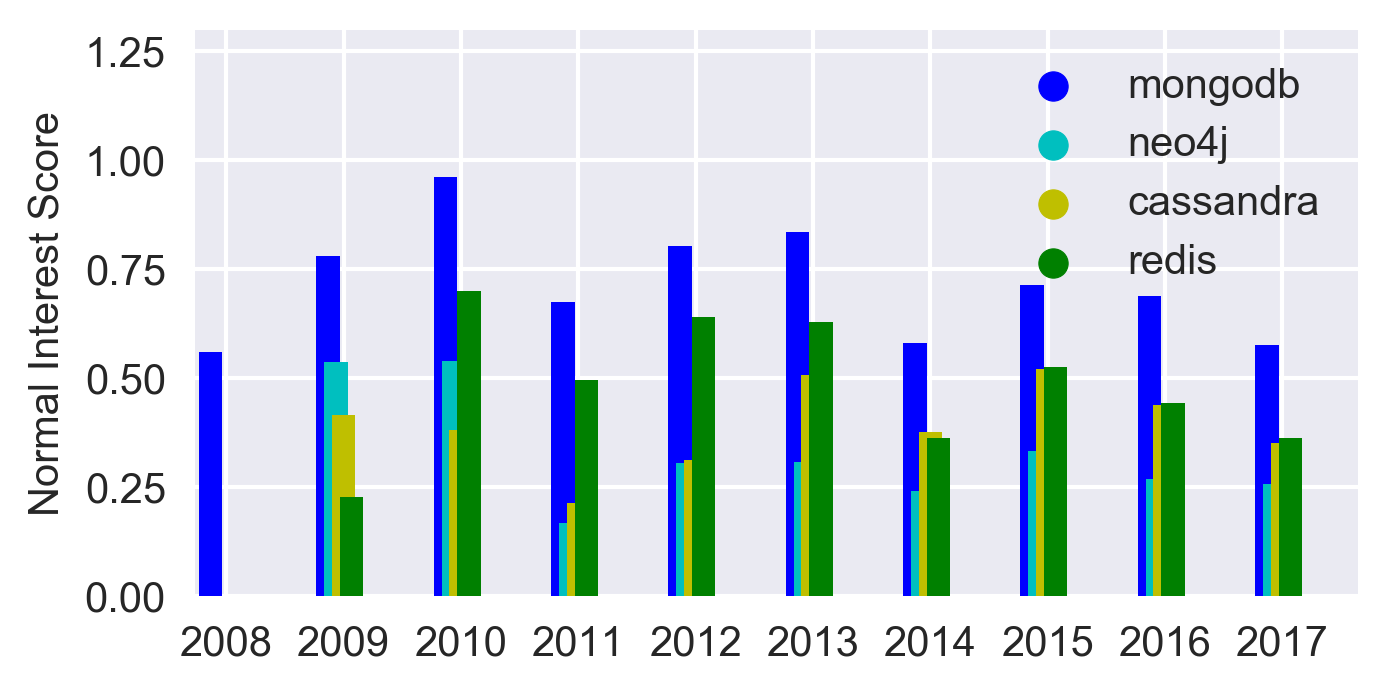

In [12]:

colors=['b','c','y','g','k','m','C2','C2','C3','C4']
for family in ['keyvalue','document','column','graph','Comparison']:
    plt.close()
    plt.subplots(figsize=(5,2.5),dpi=300)
    count=0
    t=0
    for year in alpha['mongodb']:
        for dbs in nosql[family]:
            pix=np.mean(norm(alpha[dbs][year],alpha,year)+norm(beta[dbs][year],beta,year)+norm(gamma[dbs][year],gamma,year))
           
            
            
        y=[(norm(alpha[dbs][year],alpha,year)+norm(beta[dbs][year],beta,year)+norm(gamma[dbs][year],gamma,year))/3 for dbs in nosql[family]]
        plt.bar([i+t for i in range(len(nosql[family]))],y,color=colors,width=3)
        count+=1
        t+=15
    for color,dbs in zip(colors,nosql[family]):
        plt.scatter(-2,-1,label=dbs,color=color)
    plt.xlim(-2,None)
    plt.ylim(0,1.3)
    plt.xticks([i+len(nosql[family])/2 for i in range(0,t,15)],[i for i in alpha[dbs]])
    plt.legend(loc="upper right")
    #plt.title(family.upper())
    plt.ylabel("Normal Interest Score",size=10)
    print(family)
    plt.show()

OrderedDict([('2008', [10974]),
             ('2009',
              [42614,
               123509,
               21497,
               443,
               28687,
               5033,
               2910,
               111610,
               1387,
               866,
               11046,
               13848,
               526,
               818,
               87644,
               550,
               347,
               752,
               5938,
               8474,
               682,
               7010,
               2295,
               706,
               7043,
               141189,
               558,
               4488,
               3934,
               662,
               2430,
               1014,
               1363,
               19873,
               3023]),
             ('2010',
              [7144,
               3378,
               3330,
               4008,
               45458,
               2980,
               3120,
               1802,
               1